### Reference

Introduction and EDA: https://medium.com/thecyphy/home-credit-default-risk-part-1-3bfe3c7ddd7a <br>
Feature Engineering and Modelling: https://medium.com/thecyphy/home-credit-default-risk-part-2-84b58c1ab9d5


### 【問題1】コンペティション内容の確認

コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


- **何を学習し、何を予測するのか**<br>
クライアントの返済能力を0,1目的変数（返済が困難なクライアントは１、その他は０）の２値分類問題とし、を１が出る確率を推定するモデルを構築すること

- **どのようなファイルを作りKaggleに提出するか**<br>
csvのファイルを以下の形式で『Late Submission』に提出する

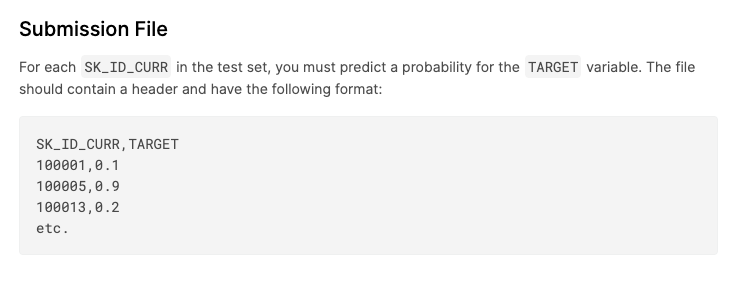

- 提出されたものはどういった指標値で評価されるのか?

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target. ROC曲線を用いて推定の確率と観測変数を評価する。ROC曲線はを閾値を変化させた時に、横軸：偽陽性率＋縦軸：真陽性率がどのように変化するのかをプロットしたものであり、そのROC曲線のx軸y軸で囲まれた部分（斜線部）の面積（AUC）で評価される。数値は最大１。無作為に当てた場合０.５が期待される。

### 【問題2】学習と検証

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#線形回帰
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#SVM
from sklearn.pipeline import make_pipeline
#決定木
from sklearn.tree import DecisionTreeRegressor
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

application_test_original = pd.read_csv('application_test.csv')
application_test_original

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [2]:
#簡単なデータ分析
#Dtypes check
application_test_original.info(121)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   NAME_CONTRACT_TYPE            object 
 2   CODE_GENDER                   object 
 3   FLAG_OWN_CAR                  object 
 4   FLAG_OWN_REALTY               object 
 5   CNT_CHILDREN                  int64  
 6   AMT_INCOME_TOTAL              float64
 7   AMT_CREDIT                    float64
 8   AMT_ANNUITY                   float64
 9   AMT_GOODS_PRICE               float64
 10  NAME_TYPE_SUITE               object 
 11  NAME_INCOME_TYPE              object 
 12  NAME_EDUCATION_TYPE           object 
 13  NAME_FAMILY_STATUS            object 
 14  NAME_HOUSING_TYPE             object 
 15  REGION_POPULATION_RELATIVE    float64
 16  DAYS_BIRTH                    int64  
 17  DAYS_EMPLOYED                 int64  
 18  DAYS_REGISTRATION        

In [5]:
#簡単なデータ分析
#Descriptive statistics
application_test_original.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [6]:
#簡単なデータ分析
#check for missing values

missing = application_test_original.isnull().sum().sort_values(ascending=False)

In [7]:
#簡単なデータ分析
#check for missing values percentage
missing_percent = (application_test_original.isnull().sum()/len(application_test_original)).sort_values(ascending=True).head(40)
missing_percent

SK_ID_CURR                     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_20               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_18               0.0
FLAG_DOCUMENT_17               0.0
FLAG_DOCUMENT_16               0.0
FLAG_DOCUMENT_15               0.0
FLAG_DOCUMENT_14               0.0
FLAG_DOCUMENT_13               0.0
FLAG_DOCUMENT_12               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
HOUR_APPR_PROCESS_ST

In [8]:
#check for missing values percentage
missing_percent = (application_test_original.isnull().sum()/len(application_test_original)).sort_values(ascending=False).head(40)
missing_percent

COMMONAREA_MEDI             0.687161
COMMONAREA_AVG              0.687161
COMMONAREA_MODE             0.687161
NONLIVINGAPARTMENTS_MODE    0.684125
NONLIVINGAPARTMENTS_MEDI    0.684125
NONLIVINGAPARTMENTS_AVG     0.684125
FONDKAPREMONT_MODE          0.672842
LIVINGAPARTMENTS_AVG        0.672493
LIVINGAPARTMENTS_MEDI       0.672493
LIVINGAPARTMENTS_MODE       0.672493
FLOORSMIN_MEDI              0.666051
FLOORSMIN_MODE              0.666051
FLOORSMIN_AVG               0.666051
OWN_CAR_AGE                 0.662892
YEARS_BUILD_MEDI            0.652757
YEARS_BUILD_MODE            0.652757
YEARS_BUILD_AVG             0.652757
LANDAREA_AVG                0.579641
LANDAREA_MODE               0.579641
LANDAREA_MEDI               0.579641
BASEMENTAREA_AVG            0.567065
BASEMENTAREA_MODE           0.567065
BASEMENTAREA_MEDI           0.567065
NONLIVINGAREA_MODE          0.535122
NONLIVINGAREA_AVG           0.535122
NONLIVINGAREA_MEDI          0.535122
ELEVATORS_AVG               0.516761
E

In [9]:
application_train_original = pd.read_csv('application_train.csv')
application_train_original

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#前処理
#Select one attribute for logistic regression (AMT_INCOME_TOTAL)
X_trainv1, X_testv1, y_trainv1, y_testv1 = train_test_split(pd.DataFrame(application_train_original.loc[:, "AMT_INCOME_TOTAL"]), 
                                                            pd.DataFrame(application_train_original.loc[:, "TARGET"]), test_size=0.25)

In [11]:
#学習
from sklearn.linear_model import LogisticRegression

model_instance = LogisticRegression(max_iter=10000)

#推定
model_instance.fit(X_trainv1, y_trainv1.values.ravel()) #error with dimensions
resultv1 = model_instance.predict_proba(X_testv1)
resultv1

array([[0.96361341, 0.03638659],
       [0.97350995, 0.02649005],
       [0.83729598, 0.16270402],
       ...,
       [0.98992015, 0.01007985],
       [0.85437116, 0.14562884],
       [0.65820335, 0.34179665]])

In [12]:
#検証
from sklearn.metrics import roc_auc_score

roc_auc_score(y_testv1, resultv1[:, 1])

0.5209000562847721

### 【問題3】テストデータに対する推定

テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [13]:
#Predict on application_test data

application_test_data = pd.DataFrame(application_test_original.loc[:, "AMT_INCOME_TOTAL"])
application_test_data

,AMT_INCOME_TOTAL
0,135000.0
1,99000.0
2,202500.0
3,315000.0
4,180000.0
...,...
48739,121500.0
48740,157500.0
48741,202500.0
48742,225000.0


In [14]:
#テストデータに対する推定
q3_results = model_instance.predict_proba(application_test_data)
q3_results

array([[0.87716939, 0.12283061],
       [0.80871089, 0.19128911],
       [0.95020867, 0.04979133],
       ...,
       [0.95020867, 0.04979133],
       [0.96361341, 0.03638659],
       [0.87716939, 0.12283061]])

In [15]:
#テストデータに対する推定結果をDF化
q3_submission_results_df1 = pd.DataFrame(q3_results[:, 1], columns=['TARGET'])
q3_submission_results_df1

,TARGET
0,0.122831
1,0.191289
2,0.049791
3,0.010080
4,0.067787
...,...
48739,0.145629
48740,0.091659
48741,0.049791
48742,0.036387


In [16]:
#テストデータIDをDF化
q3_submission_results_df2 = application_test_original.loc[:, ['SK_ID_CURR']]
q3_submission_results_df2

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [17]:
#Submission fileのDF化

q3_submission_results = pd.concat([q3_submission_results_df2, q3_submission_results_df1], axis=1)
q3_submission_results

,SK_ID_CURR,TARGET
0,100001,0.122831
1,100005,0.191289
2,100013,0.049791
3,100028,0.010080
4,100038,0.067787
...,...,...
48739,456221,0.145629
48740,456222,0.091659
48741,456223,0.049791
48742,456224,0.036387


In [18]:
#Create csv file

csv_submission = q3_submission_results.to_csv('/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK4/授業課題/MH/q3_submission_file.csv', index=False)
csv_submission

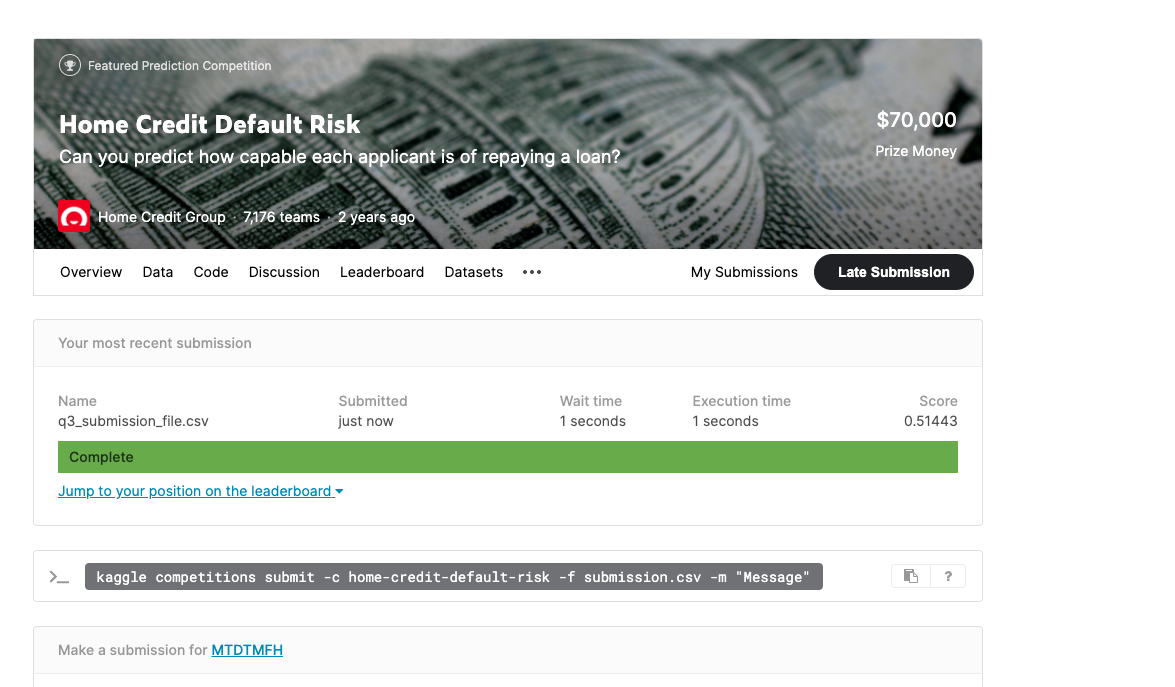

### 【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

- どの特徴量を使うか
- どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

**特徴量エンジニアリング修正のポイント**

- ポイント１：１００以上あるここの特徴量は１ずつの特徴量で見るとそれほど目的変数の値（０、１）と強い相関関係を持っているとは言えないので、より多くの特徴量をモデルに含めて分類させる方法が妥当ではないかと考えられる。
    - 比較的に強い相関だけを持っている特徴量（正の上位１５、負の下位１５）だけを入れた時の出力結果を確認 


- ポイント２：カテゴリーデータが１６個あるので、それらを数値化する必要性がある
    - Hot-encoding
    
    
- ポイント３：特徴量の分布は正規分布であるものとそうでないものがあるかと考えられるので、検討する
    - 特徴量を標準化する

- ポイント4：Mean Imputation欠損値をその列の平均値にする
    - 出力結果を確認

- ポイント5：全ての特徴量/特徴量エンジニアリングの結果を用いて学習（上記の点の混合）
    - 出力結果を確認


### ポイント１：比較的に強い相関だけを持っている特徴量（正の上位１５、負の下位１５）だけを入れた時の出力結果を確認 ### 

In [72]:
#ポイント１　Check correlations
correlations = application_train_original.corr(method='pearson')['TARGET'].sort_values()
print('Most Positive Correlations:' + '\n', correlations.tail(15))
print('Most Negative Correlations:' + '\n', correlations.head(15))

tail_features = correlations.tail(15).index
head_features = correlations.head(15).index

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
R

１００以上あるここの特徴量は１ずつの特徴量で見るとそれほど目的変数の値（０、１）と強い相関関係を持っているとは言えないので、トップ・ボトムの１５個の特徴量を用いて学習させることによって、推定の良さをあげようとします。より多くの特徴量をモデルに含めて分類させる方法が妥当ではないかと考えられる。

In [99]:
#Create df

features = list(tail_features) + list(head_features) + list(['TARGET'])

print(features)

features_df = pd.DataFrame()

for feature in features:
    features_df[feature] = application_train_original[feature]    
    

features_df

['DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'OWN_CAR_AGE', 'DAYS_REGISTRATION', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'TARGET']


,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,OWN_CAR_AGE,DAYS_REGISTRATION,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,...,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI
0,2.0,2.0,0,NaN,-3648.0,1,0,1,0,-2120,...,0.0833,0.0833,351000.0,0.018801,0.00,0.00,0.1250,0.1250,0.0190,0.0193
1,0.0,0.0,0,NaN,-1186.0,1,0,1,0,-291,...,0.2917,0.2917,1129500.0,0.003541,0.08,0.08,0.3333,0.3333,0.0549,0.0558
2,0.0,0.0,0,26.0,-4260.0,0,0,1,0,-2531,...,NaN,NaN,135000.0,0.010032,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0,NaN,-9833.0,1,0,1,0,-2437,...,NaN,NaN,297000.0,0.008019,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1,NaN,-4311.0,0,0,1,1,-3458,...,NaN,NaN,513000.0,0.028663,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0,NaN,-8456.0,0,0,1,0,-1982,...,0.6042,0.4583,225000.0,0.032561,0.22,0.22,0.2708,0.2708,0.1965,0.2001
307507,0.0,0.0,0,NaN,-4388.0,1,0,0,0,-4090,...,0.0833,0.0833,225000.0,0.025164,0.00,0.00,0.1250,0.1250,0.0257,0.0261
307508,0.0,0.0,1,NaN,-6737.0,1,0,1,1,-5150,...,0.1667,0.1667,585000.0,0.005002,0.00,0.00,0.2083,0.2083,0.9279,0.9445
307509,0.0,0.0,0,NaN,-2562.0,1,1,1,1,-931,...,0.0417,0.0417,319500.0,0.005313,NaN,NaN,NaN,NaN,0.0061,0.0062


In [100]:
features_df['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [117]:
features_df_dropna = features_df.fillna(0)
features_df_dropna

,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,OWN_CAR_AGE,DAYS_REGISTRATION,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,...,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI
0,2.0,2.0,0,0.0,-3648.0,1,0,1,0,-2120,...,0.0833,0.0833,351000.0,0.018801,0.00,0.00,0.1250,0.1250,0.0190,0.0193
1,0.0,0.0,0,0.0,-1186.0,1,0,1,0,-291,...,0.2917,0.2917,1129500.0,0.003541,0.08,0.08,0.3333,0.3333,0.0549,0.0558
2,0.0,0.0,0,26.0,-4260.0,0,0,1,0,-2531,...,0.0000,0.0000,135000.0,0.010032,0.00,0.00,0.0000,0.0000,0.0000,0.0000
3,0.0,0.0,0,0.0,-9833.0,1,0,1,0,-2437,...,0.0000,0.0000,297000.0,0.008019,0.00,0.00,0.0000,0.0000,0.0000,0.0000
4,0.0,0.0,1,0.0,-4311.0,0,0,1,1,-3458,...,0.0000,0.0000,513000.0,0.028663,0.00,0.00,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0,0.0,-8456.0,0,0,1,0,-1982,...,0.6042,0.4583,225000.0,0.032561,0.22,0.22,0.2708,0.2708,0.1965,0.2001
307507,0.0,0.0,0,0.0,-4388.0,1,0,0,0,-4090,...,0.0833,0.0833,225000.0,0.025164,0.00,0.00,0.1250,0.1250,0.0257,0.0261
307508,0.0,0.0,1,0.0,-6737.0,1,0,1,1,-5150,...,0.1667,0.1667,585000.0,0.005002,0.00,0.00,0.2083,0.2083,0.9279,0.9445
307509,0.0,0.0,0,0.0,-2562.0,1,1,1,1,-931,...,0.0417,0.0417,319500.0,0.005313,0.00,0.00,0.0000,0.0000,0.0061,0.0062


In [118]:
#前処理
features = features_df_dropna.drop('TARGET', axis=1)

#Select one attribute for logistic regression (AMT_INCOME_TOTAL)
X_train_eg1, X_test_eg1, y_train_eg1, y_test_eg1 = train_test_split(pd.DataFrame(features), 
                                                                    pd.DataFrame(features_df_dropna.loc[:, "TARGET"]), test_size=0.25)


In [119]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=10000)

#推定
LR_model.fit(X_train_eg1, y_train_eg1.values.ravel())
result_eg1 = LR_model.predict_proba(X_test_eg1)
result_eg1

array([[0.93655288, 0.06344712],
       [0.94854595, 0.05145405],
       [0.94382212, 0.05617788],
       ...,
       [0.85372971, 0.14627029],
       [0.89862461, 0.10137539],
       [0.89216935, 0.10783065]])

In [120]:
#検証
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_eg1, result_eg1[:, 1])

0.605416200072679

**ポイント1の結果＞特徴量を正の１５個、負の１５個でモデルの学習をしたところ、roc_auc_scoreは特徴量１つに絞ったモデルの５２％ほどから６０％ほどに上昇した。**

### ポイント２：カテゴリーデータが１６個あるので、それらを数値化する必要性があるHot-encoding

In [124]:
#ポイント２：カテゴリーデータが１６個あるので、それらを数値化する必要性があるHot-encoding
application_train_original.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [125]:
#ポイント２　check unique values in categorical data
application_train_original.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [126]:
#One-Hot Encoding
application_train = pd.get_dummies(application_train_original)
application_test = pd.get_dummies(application_test_original)

print('Original Training Features shape: ', application_train_original.shape)
print('Original Training Features shape: ', application_test_original.shape, "\n")
print('One-Hot Endcoding Training Features shape: ', application_train.shape)
print('One-Hot Endcoding Testing Features shape: ', application_test.shape)

Original Training Features shape:  (307511, 122)
Original Training Features shape:  (48744, 121) 

One-Hot Endcoding Training Features shape:  (307511, 246)
One-Hot Endcoding Testing Features shape:  (48744, 242)


エンコーディングを終えた結果、列数が約１２２から約２４６程へ増加した。

In [127]:
#ALIGN THE DIMENSIONS OF THE DATASET

#save the target in a variable before alignment -> as we keep only columns available in both frames
train_labels = application_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
application_train, application_test = application_train.align(application_test, join = 'inner', axis = 1)
'''
df.align(df_of_shape_to_align_to, join='inner', axis=1)
'''

# Add the target back in
application_train['TARGET'] = train_labels

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


In [149]:
X_train_eg2, X_test_eg2, y_train_eg2, y_test_eg2 = train_test_split(application_train.iloc[:, :-1], application_train.loc[:, "TARGET"], test_size=0.25)

In [150]:
X_train_eg2 = X_train_eg2.fillna(0)
X_test_eg2 = X_test_eg2.fillna(0)

In [151]:
#check before proceeding
X_train_eg2.shape, X_test_eg2.shape, y_train_eg2.shape, y_test_eg2.shape

((230633, 242), (76878, 242), (230633,), (76878,))

In [152]:
#check before proceeding
X_train_eg2.info(242)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230633 entries, 122495 to 253901
Data columns (total 242 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   SK_ID_CURR                                         int64  
 1   CNT_CHILDREN                                       int64  
 2   AMT_INCOME_TOTAL                                   float64
 3   AMT_CREDIT                                         float64
 4   AMT_ANNUITY                                        float64
 5   AMT_GOODS_PRICE                                    float64
 6   REGION_POPULATION_RELATIVE                         float64
 7   DAYS_BIRTH                                         int64  
 8   DAYS_EMPLOYED                                      int64  
 9   DAYS_REGISTRATION                                  float64
 10  DAYS_ID_PUBLISH                                    int64  
 11  OWN_CAR_AGE                                   

In [154]:
LR_model_eg2 = LogisticRegression(max_iter=10000)

#推定
LR_model_eg2.fit(X_train_eg2, y_train_eg2)
result_eg2 = LR_model_eg2.predict_proba(X_test_eg2)
result_eg2

array([[0.95509839, 0.04490161],
       [0.95001242, 0.04998758],
       [0.97745309, 0.02254691],
       ...,
       [0.97098253, 0.02901747],
       [0.94011452, 0.05988548],
       [0.88169535, 0.11830465]])

In [155]:
roc_auc_score(y_test_eg2, result_eg2[:, 1])

0.6221559116889825

**ポイント2の結果＞カテゴリー変数もHot-encodingでモデルに学習をしたところ、roc_auc_scoreは６２％ほどに上昇した**

### ポイント３：特徴量の分布は正規分布であるものとそうでないものがあるかと考えられるので、標準化をする

In [156]:
#ポイント３　check distribution of features
check_df = application_train_original.dropna()
check_df = check_df.select_dtypes('float64', 'int64')

from scipy.stats import normaltest
alpha = 0.05

# normality test
for key, values in check_df.items():
    stat, p = normaltest(values)
    print("For column {} the statistics are {}, p={}".format(key, stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

For column AMT_INCOME_TOTAL the statistics are 10893.53040317884, p=0.0
Sample does not look Gaussian (reject H0)
For column AMT_CREDIT the statistics are 1552.1271749674245, p=0.0
Sample does not look Gaussian (reject H0)
For column AMT_ANNUITY the statistics are 3054.060452612362, p=0.0
Sample does not look Gaussian (reject H0)
For column AMT_GOODS_PRICE the statistics are 1781.699965498239, p=0.0
Sample does not look Gaussian (reject H0)
For column REGION_POPULATION_RELATIVE the statistics are 2405.258393115133, p=0.0
Sample does not look Gaussian (reject H0)
For column DAYS_REGISTRATION the statistics are 499.80283417420094, p=2.9457340801471446e-109
Sample does not look Gaussian (reject H0)
For column OWN_CAR_AGE the statistics are 5435.395806834114, p=0.0
Sample does not look Gaussian (reject H0)
For column CNT_FAM_MEMBERS the statistics are 341.94686087925635, p=5.587050643301814e-75
Sample does not look Gaussian (reject H0)
For column EXT_SOURCE_1 the statistics are 1413.239142

In [157]:
X_train_eg3, X_test_eg3, y_train_eg3, y_test_eg3 = train_test_split(application_train.iloc[:, :-1], application_train.loc[:, "TARGET"], test_size=0.25)

In [159]:
#ポイント３　特徴量の標準化
scaler = StandardScaler()

#x_train needs to be fit the transformed -> x_train will have the information from the fit so just needs to be transformed
scaler.fit(X_train_eg3)
X_train_std = scaler.transform(X_train_eg3)
X_test_std = scaler.transform(X_test_eg3)

X_train_std, X_test_std

(array([[ 1.49594506,  0.80786694,  0.21159742, ..., -0.13297035,
          0.96326002, -0.08739006],
        [-0.82824442,  0.80786694, -0.29770183, ..., -0.13297035,
         -1.03814129, -0.08739006],
        [ 0.44626184, -0.5777473 ,  0.21159742, ..., -0.13297035,
          0.96326002, -0.08739006],
        ...,
        [ 1.32082117,  2.19348119, -0.33165511, ..., -0.13297035,
         -1.03814129, -0.08739006],
        [-1.26195955, -0.5777473 ,  0.14369085, ..., -0.13297035,
          0.96326002, -0.08739006],
        [-1.2628057 , -0.5777473 ,  0.041831  , ..., -0.13297035,
          0.96326002, -0.08739006]]),
 array([[-9.77516963e-01, -5.77747304e-01,  2.11597417e-01, ...,
         -1.32970348e-01, -1.03814129e+00, -8.73900621e-02],
        [-4.72642310e-03, -5.77747304e-01, -2.97701827e-01, ...,
         -1.32970348e-01, -1.03814129e+00, -8.73900621e-02],
        [-7.25831081e-01,  8.07866943e-01, -1.95841978e-01, ...,
          7.52047368e+00,  9.63260020e-01, -8.73900621e-

In [162]:
#ポイント３　check distribution of features
X_train_df = pd.DataFrame(data=X_train_std, columns=X_train_eg3.columns)
X_test_df = pd.DataFrame(data=X_test_std, columns=X_train_eg3.columns)
y_train_df = y_train_eg3.to_frame(name='TARGET')
y_test_df = y_test_eg3.to_frame(name='TARGET')

In [165]:
X_train_eg3 = X_train_eg3.fillna(0)
X_test_eg3 = X_test_eg3.fillna(0)

In [167]:
X_train_eg3.isnull().sum()

SK_ID_CURR                         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
                                  ..
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
Length: 242, dtype: int64

In [169]:
#学習
from sklearn.linear_model import LogisticRegression

LR_model_eg3 = LogisticRegression(max_iter=10000)

#推定
LR_model_eg3.fit(X_train_eg3, y_train_eg3)
result_eg3 = LR_model_eg3.predict_proba(X_test_eg3)
result_eg3

array([[0.98171157, 0.01828843],
       [0.94798786, 0.05201214],
       [0.89910298, 0.10089702],
       ...,
       [0.97499114, 0.02500886],
       [0.94201604, 0.05798396],
       [0.93664866, 0.06335134]])

In [171]:
#評価
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_eg3, result_eg3[:, 1])

0.6242882651159186

**ポイント3の結果＞標準化してモデルに学習をしたところ、roc_auc_scoreは６２％ほどに上昇した**

### ポイント4：Mean Imputationで欠損値をその列の平均値にする

In [177]:
#ポイント５：Mean Imputation欠損値をその列の平均値にする
mean_imputation = pd.DataFrame()
for columns in application_train.columns:
    mean_imputation[columns] = application_train[columns].fillna((application_train[columns].mean()))
        
mean_imputation_features = mean_imputation.drop('TARGET', axis=1)
mean_imputation.shape, mean_imputation_features.shape

((307511, 243), (307511, 242))

In [178]:
X_train_eg4, X_test_eg4, y_train_eg4, y_test_eg4 = train_test_split(mean_imputation_features, mean_imputation.loc[:, "TARGET"], test_size=0.25)

In [179]:
#学習
from sklearn.linear_model import LogisticRegression

LR_model_eg4 = LogisticRegression(max_iter=10000)

#推定
LR_model_eg4.fit(X_train_eg4, y_train_eg4)
result_eg4 = LR_model_eg4.predict_proba(X_test_eg4)
result_eg4

array([[0.93485263, 0.06514737],
       [0.92887104, 0.07112896],
       [0.91830391, 0.08169609],
       ...,
       [0.94683905, 0.05316095],
       [0.95234792, 0.04765208],
       [0.88927391, 0.11072609]])

In [180]:
#評価
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_eg4, result_eg4[:, 1])

0.6170820683180744

**ポイント4の結果＞標準化してモデルに学習をしたところ、roc_auc_scoreは６２％ほどに上昇した**

### ポイント5：全ての特徴量/特徴量エンジニアリングの結果を用いて学習（上記の点の混合）

In [189]:
#Steps
#OHE -> Standardization -> Fillna(df.mean())

#OHE
X_train_eg5, X_test_eg5, y_train_eg5, y_test_eg5 = train_test_split(application_train.iloc[:, :-1], application_train.loc[:, "TARGET"], test_size=0.25)


In [190]:
#Standardization

scaler = StandardScaler()

#x_train needs to be fit the transformed -> x_train will have the information from the fit so just needs to be transformed
scaler.fit(X_train_eg5)
X_train_std_eg5 = scaler.transform(X_train_eg5)
X_test_std_eg5 = scaler.transform(X_test_eg5)

X_train_std_eg5, X_test_std_eg5

(array([[-1.67075711, -0.57693499,  0.02244122, ...,  7.52142886,
          0.96436477, -0.08781725],
        [ 0.05243137, -0.57693499,  1.31476899, ..., -0.13295346,
          0.96436477, -0.08781725],
        [-0.16531415, -0.57693499, -0.50256693, ..., -0.13295346,
         -1.03695202, -0.08781725],
        ...,
        [ 0.42369182, -0.57693499, -0.32487186, ..., -0.13295346,
         -1.03695202, -0.08781725],
        [-1.19592373,  0.80897933,  0.91091657, ..., -0.13295346,
         -1.03695202, -0.08781725],
        [ 0.47448062, -0.57693499,  0.10321171, ..., -0.13295346,
         -1.03695202, 11.38728479]]),
 array([[-0.01834979,  0.80897933, -0.50256693, ..., -0.13295346,
         -1.03695202, -0.08781725],
        [ 0.7368537 ,  0.80897933, -0.86603412, ..., -0.13295346,
          0.96436477, -0.08781725],
        [ 1.45507034, -0.57693499,  0.50706414, ..., -0.13295346,
         -1.03695202, -0.08781725],
        ...,
        [-0.54115902, -0.57693499,  0.10321171, ..., -

In [209]:
X_train_df_eg5 = pd.DataFrame(data=X_train_std_eg5, columns=X_train_eg5.columns)
X_test_df_eg5 = pd.DataFrame(data=X_test_std_eg5, columns=X_test_eg5.columns)
y_train_df_eg5 = y_train_eg5.to_frame(name='TARGET')
y_test_df_eg5 = y_test_eg5.to_frame(name='TARGET')

X_test_df_eg5.shape

(76878, 242)

In [210]:
# Fillna(df.mean()) - application_train

mean_imputation_train_eg5 = pd.DataFrame()
mean_imputation_test_eg5 = pd.DataFrame()

for columns in X_train_df_eg5.columns:
    mean_imputation_train_eg5[columns] = X_train_df_eg5[columns].fillna((X_train_df_eg5[columns].mean()))
    mean_imputation_test_eg5[columns] = X_test_df_eg5[columns].fillna((X_test_df_eg5[columns].mean()))
        
mean_imputation_eg5

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-1.670757,-0.576935,0.022441,-0.371380,0.229825,-0.240340,-0.834435,1.350889,-0.464560,0.125310,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,7.521429,0.964365,-0.087817
1,0.052431,-0.576935,1.314769,-0.818550,-0.940353,-0.727426,-0.983180,-0.368759,-0.474102,-1.101915,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,1.933272,-0.132953,0.964365,-0.087817
2,-0.165314,-0.576935,-0.502567,-0.782776,-1.158227,-0.849198,-0.775731,-1.548981,2.133882,-2.193475,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
3,-0.281940,-0.576935,-0.906419,-0.673455,-0.873841,-0.690895,-0.925848,-1.079736,2.133882,-2.165661,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
4,-1.172982,-0.576935,0.103212,-0.712303,-1.063432,-0.727426,-0.868227,-1.291195,2.133882,-0.651498,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230628,-1.440884,-0.576935,0.910917,0.253986,2.930093,0.368518,0.268590,-1.697140,-0.506800,-1.139379,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,1.933272,-0.132953,0.964365,-0.087817
230629,-0.970323,-0.576935,-0.906419,-1.153927,-1.406560,-1.092741,-0.845916,0.491295,-0.457814,1.104194,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
230630,0.423692,-0.576935,-0.324872,-0.135275,0.587250,-0.240340,-1.029753,0.439462,-0.454083,1.312800,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
230631,-1.195924,0.808979,0.910917,0.299374,0.234176,0.490289,1.076002,1.077507,-0.472361,0.001565,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817


In [211]:
mean_imputation_eg5.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                               0
OCCUPATION_TYPE_Managers                 0
OCCUPATION_TYPE_Medicine staff           0
OCCUPATION_TYPE_Private service staff    0
OCCUPATION_TYPE_Realty agents            0
                                        ..
FLAG_DOCUMENT_9                          0
FLAG_DOCUMENT_10                         0
FLAG_DOCUMENT_11                         0
BASEMENTAREA_MEDI                        0
EMERGENCYSTATE_MODE_Yes                  0
Length: 242, dtype: int64

In [212]:
LR_model_eg5 = LogisticRegression(max_iter=15000)

#推定
LR_model_eg5.fit(mean_imputation_train_eg5, y_train_df_eg5.values.ravel())
result_eg5 = LR_model_eg5.predict_proba(mean_imputation_test_eg5)
result_eg5

array([[0.95511803, 0.04488197],
       [0.89771023, 0.10228977],
       [0.83545848, 0.16454152],
       ...,
       [0.95857328, 0.04142672],
       [0.64738953, 0.35261047],
       [0.87465053, 0.12534947]])

In [213]:
roc_auc_score(y_test_df_eg5, result_eg5[:, 1])

0.7470279514255017

**ポイント4の結果＞全ての特徴量/特徴量エンジニアリングの結果を用いて学習（上記の点の混合）した場合、およそ７５％の結果を得ることができたが、説明力に少しかけている面もあり、次に何をすれば良いのかはあまり見えてこない**

### 提出に関するコード

In [216]:
# Fillna(df.mean()) - application_test

application_test_std = scaler.transform(application_test)
application_test_std = pd.DataFrame(data=application_test_std, columns=application_test.columns)

test_mean_imputation_test_eg5 = pd.DataFrame()

for columns in application_test.columns:
    test_mean_imputation_test_eg5[columns] = application_test_std[columns].fillna((application_test_std[columns].mean()))
        
test_mean_imputation_test_eg5

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-1.734735,-0.576935,-0.300641,-0.076248,-0.452701,-0.240340,-0.147319,-0.735256,-0.468121,-0.051508,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,1.933272,-0.132953,0.964365,-0.087817
1,-1.734696,-0.576935,-0.623723,-0.935887,-0.673062,-0.970969,1.076002,-0.465314,-0.483269,-1.172018,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
2,-1.734618,-0.576935,0.305138,0.158426,2.946566,0.246746,-0.129195,-0.918046,-0.483192,0.798523,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
3,-1.734472,2.194894,1.314769,2.423430,1.512825,2.803949,0.397262,0.472259,-0.464843,0.848191,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,1.913606,-0.517258,-0.132953,0.964365,-0.087817
4,-1.734375,0.808979,0.103212,0.064610,0.342025,0.234569,-0.784035,0.686928,-0.467144,0.280557,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,1.732491,-0.576935,-0.421796,-0.464392,-0.665913,-0.727426,-1.360964,-0.902451,-0.488225,-1.165206,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
48740,1.732501,2.194894,-0.098715,0.056941,0.331147,-0.118569,1.076002,1.112138,-0.459768,0.560117,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,-0.517258,-0.132953,-1.036952,-0.087817
48741,1.732511,0.808979,0.305138,-0.706758,0.420659,-0.605655,0.397262,0.025948,-0.473132,0.654912,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,-0.522573,1.933272,-0.132953,0.964365,-0.087817
48742,1.732520,-0.576935,0.507064,-0.371380,-0.137235,-0.240340,-0.147319,0.474093,-0.470966,1.001169,...,-0.062765,-0.175535,-0.085429,-0.076904,-0.073014,1.913606,-0.517258,-0.132953,0.964365,-0.087817


In [217]:
#結果
submission_results = LR_model_eg5.predict_proba(test_mean_imputation_test_eg5)
submission_results

array([[0.94248732, 0.05751268],
       [0.78075728, 0.21924272],
       [0.95703673, 0.04296327],
       ...,
       [0.95496182, 0.04503818],
       [0.95291083, 0.04708917],
       [0.87028389, 0.12971611]])

In [218]:
print(type(submission_results))
submission_results_df = pd.DataFrame(submission_results[:, 1], columns=['TARGET'])
submission_results_df

<class 'numpy.ndarray'>


,TARGET
0,0.057513
1,0.219243
2,0.042963
3,0.028194
4,0.125435
...,...
48739,0.046873
48740,0.064563
48741,0.045038
48742,0.047089


In [219]:
sample_submission = pd.read_csv("sample_submission.csv")
submission = sample_submission.drop(['TARGET'], axis=1)
submission

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [220]:
final_submission = pd.concat([submission.loc[:, ['SK_ID_CURR']], submission_results_df], axis=1)
final_submission

,SK_ID_CURR,TARGET
0,100001,0.057513
1,100005,0.219243
2,100013,0.042963
3,100028,0.028194
4,100038,0.125435
...,...,...
48739,456221,0.046873
48740,456222,0.064563
48741,456223,0.045038
48742,456224,0.047089


In [221]:
import os
os.getcwd()

'/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK4/授業課題/MH'

In [222]:
csv_submission_final = final_submission.to_csv('/Users/MatthewH/Desktop/Study/Data Science and Maths/Data Science and Machine Learning/Machine Learning/DIVE INTO CODE/事前予習/WEEK4/授業課題/MH/submission_file.csv', index=False)
csv_submission_final

In [223]:
os.listdir()

['application_test.csv',
 'q3_submission_file.csv',
 'submission_file.csv',
 'application_train.csv',
 'WEEK4 CLASS Ex.1 .ipynb',
 '.ipynb_checkpoints',
 'sample_submission.csv']

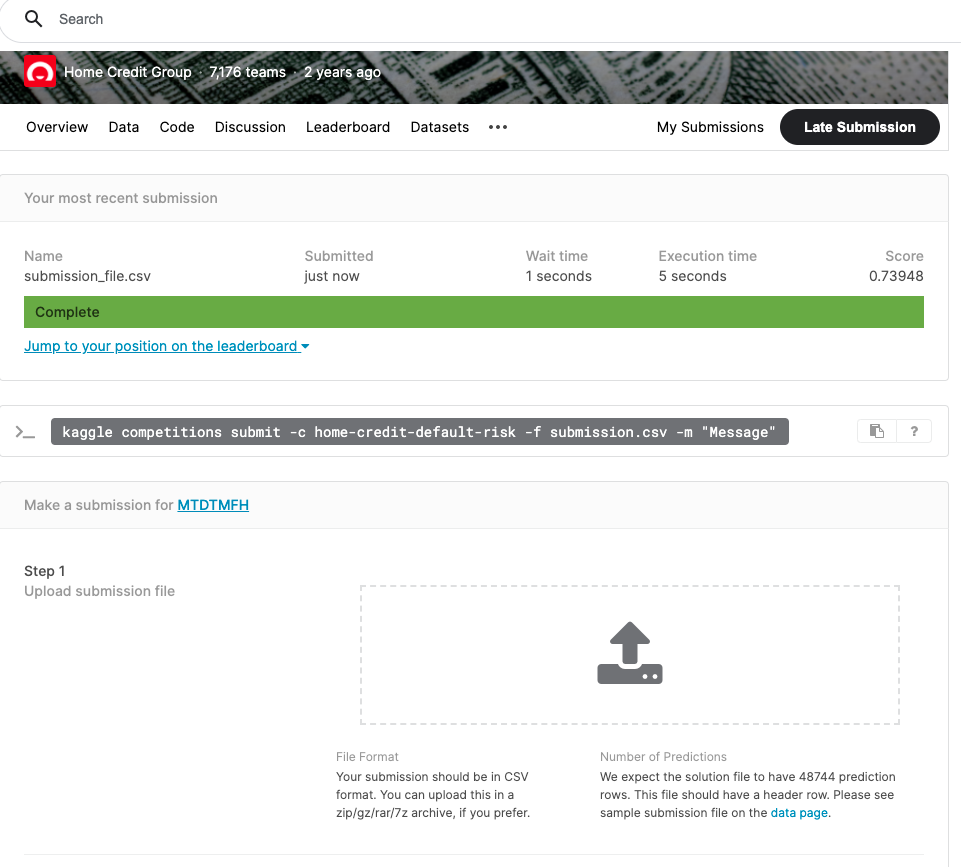

### Appendix

In [70]:
#ポイント４　　　Zero Imputation欠損値を０に直す
zero_imputation = pd.DataFrame()
for columns in application_train_original.columns:
    if (application_train_original[columns].dtype != 'object'):
        zero_imputation[columns] = application_train_original[columns].fillna(0)
    else:
        zero_imputation[columns] = application_train_original[columns]
        
zero_imputation

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
